In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [8]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [9]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [12]:
df[['Region']] = df[['Region']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [13]:
df=df.dropna().reset_index(drop=True)

In [18]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [17]:
df = df.drop(122).reset_index(drop=True)

In [21]:
## filling the spaces
df.columns=df.columns.str.strip()

In [29]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [33]:
##change the  columns as float and int
df[['day', 'month', 'year', 'Temperature', 'RH','Ws']] =df[['day', 'month', 'year', 'Temperature', 'RH','Ws']].astype(int)

In [31]:
df[['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [36]:
columns = [features for features in df.columns if df[features].dtype=='O']

In [39]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [40]:
df.to_csv('Algerian_forest_fires_dataset_Cleaned.csv',index=False)

In [76]:
df1 = df.drop(['day','month','year'],axis=1)

In [77]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [78]:
df1['Classes'] = df1['Classes'].str.strip()

In [79]:
df1['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [80]:
df1['Classes'] = np.where(df1['Classes']=='fire',1,0)

In [81]:
df1['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [83]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

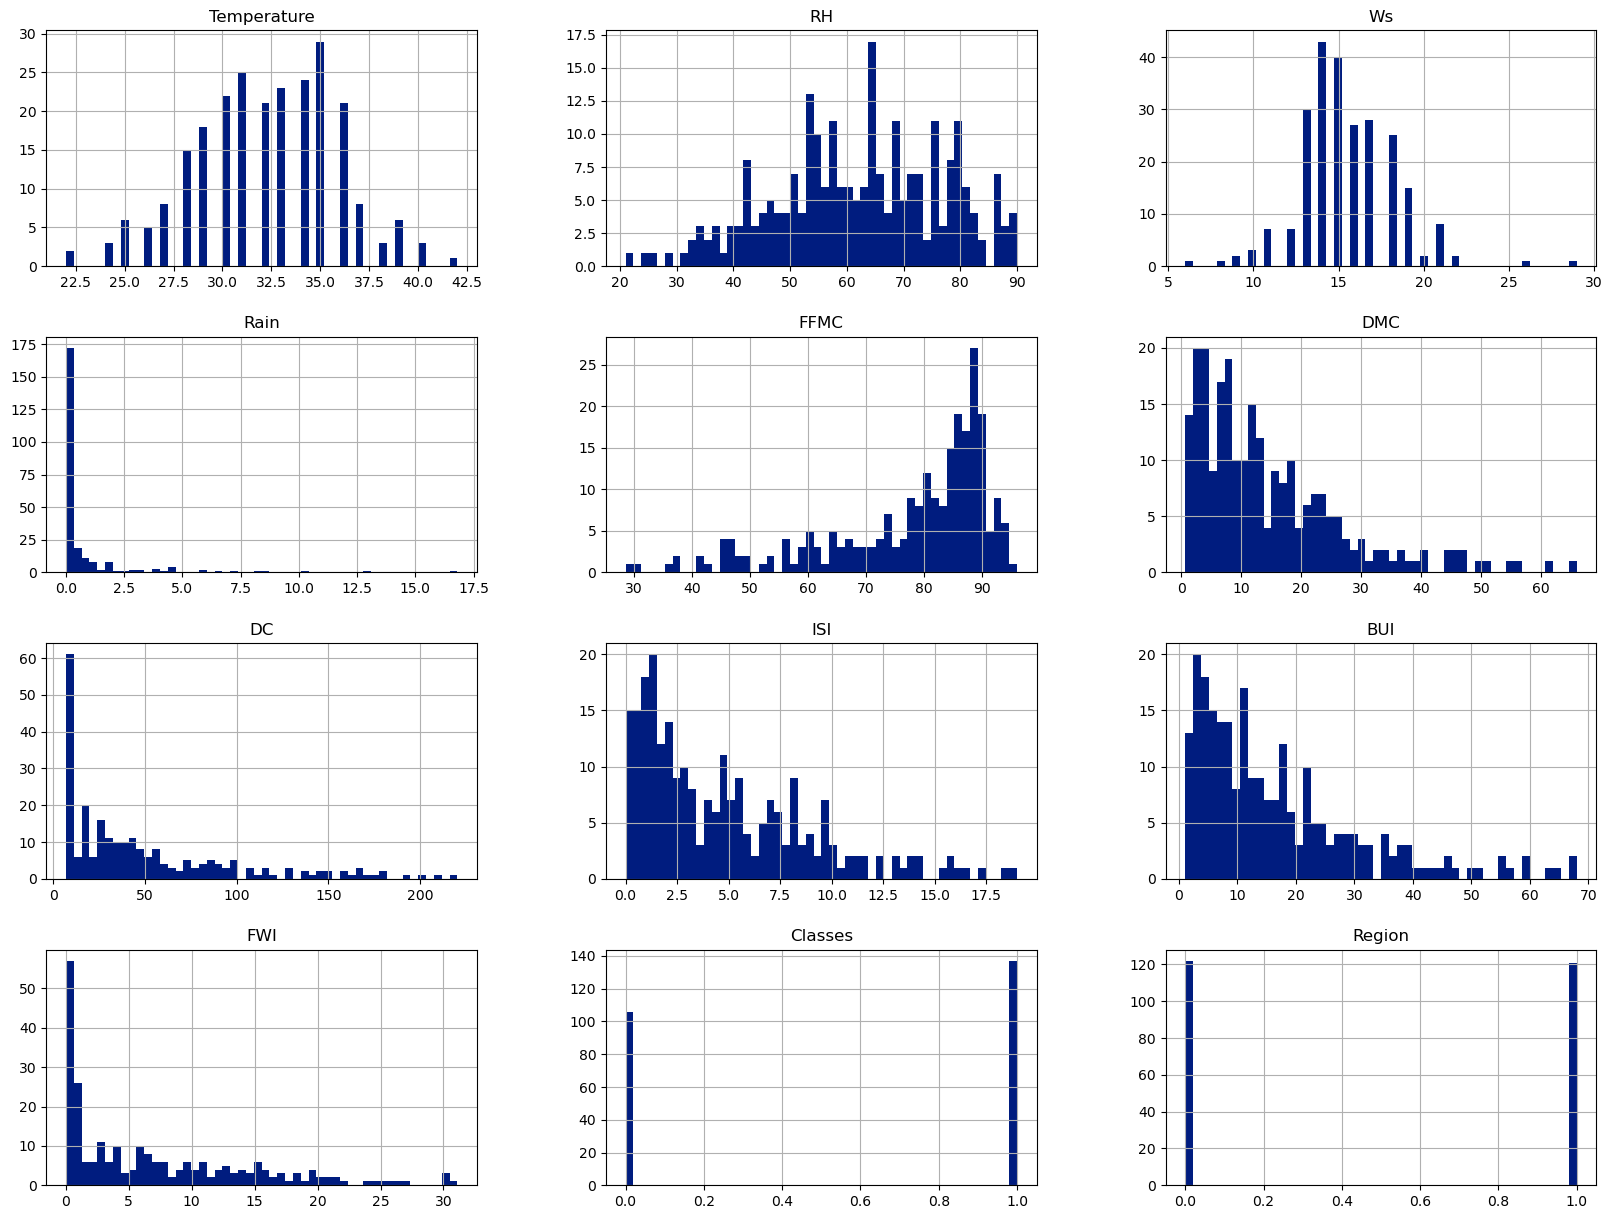

In [85]:
## plot density plot
plt.style.use('seaborn-v0_8-dark-palette')
df1.hist(bins=50,figsize=(20,15))
plt.show()

In [90]:
df1['Classes'].value_counts(normalize=True)

Classes
1    0.563786
0    0.436214
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x2378ee6c860>,
 [Text(-0.21895639684834634, 1.0779879852202388, 'Fire'),
  Text(0.21895649777686463, -1.0779879647200568, 'Not Fire')],
 [Text(-0.1194307619172798, 0.5879934464837665, '56.4%'),
  Text(0.11943081696919887, -0.587993435301849, '43.6%')])

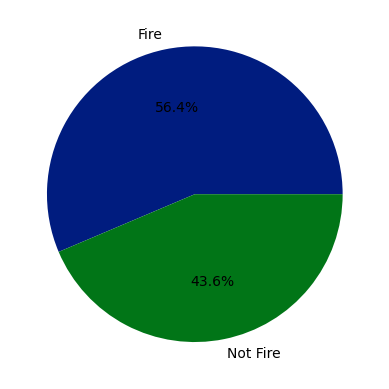

In [91]:
## percentage for pie chart
classlable=['fire','not fire']
plt.pie(df1['Classes'].value_counts(normalize=True)*100,labels=['Fire','Not Fire'],autopct='%1.1f%%')

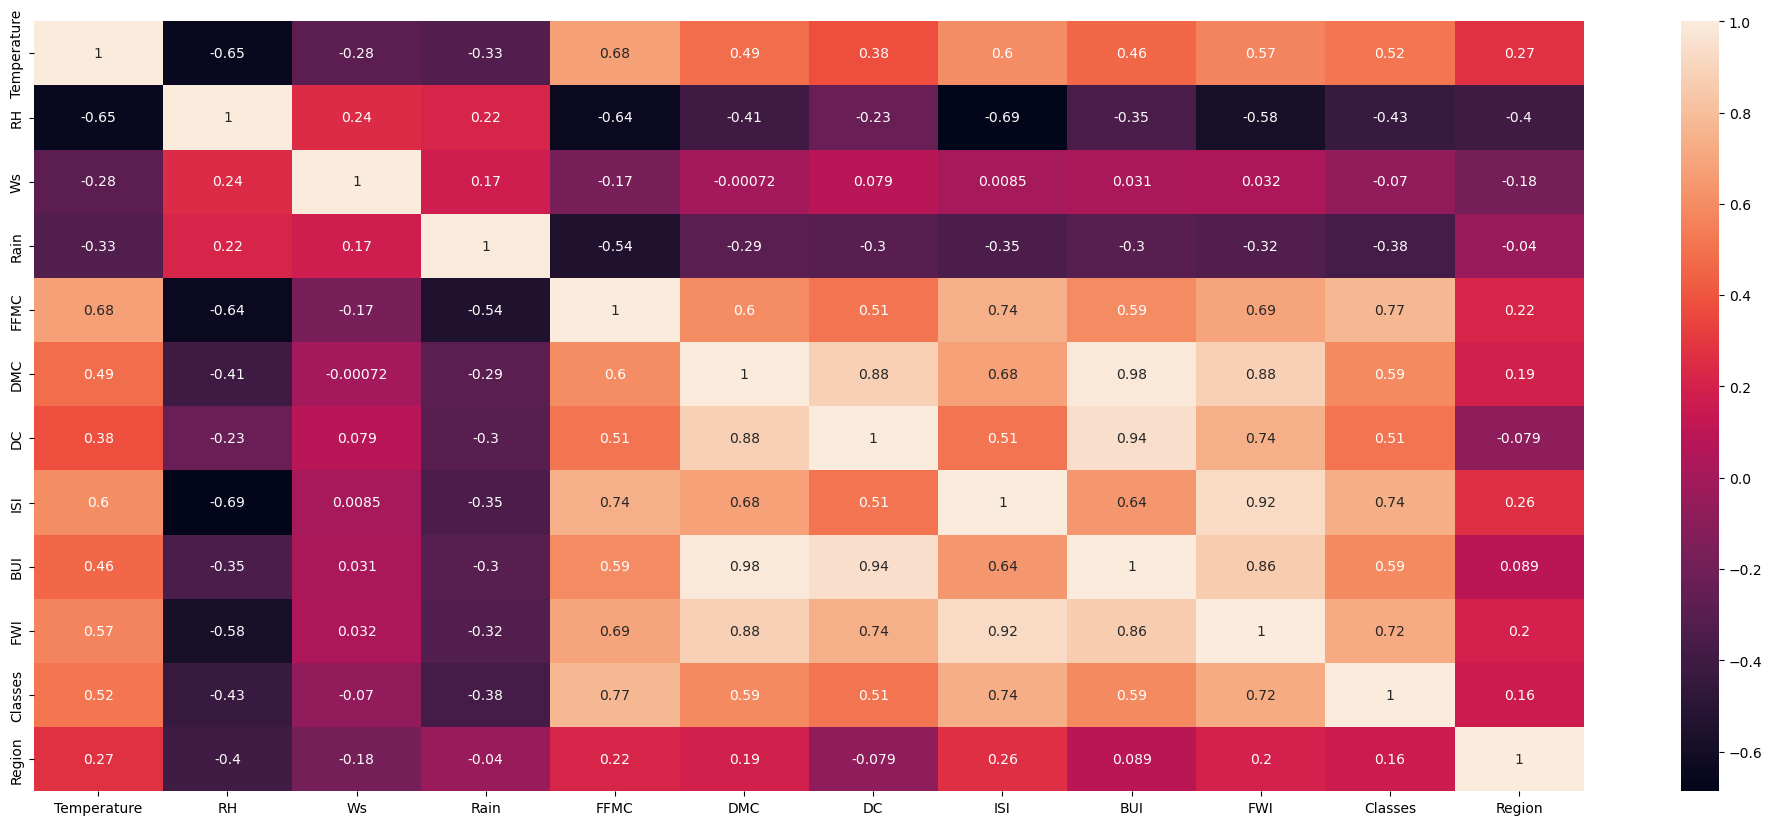

In [101]:
plt.figure(figsize=(25,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

<Axes: ylabel='FWI'>

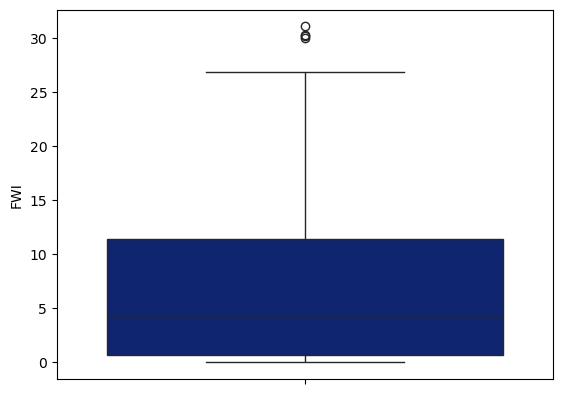

In [102]:
sns.boxplot(df1['FWI'])

In [103]:
df['Classes'] = df['Classes'].str.strip()

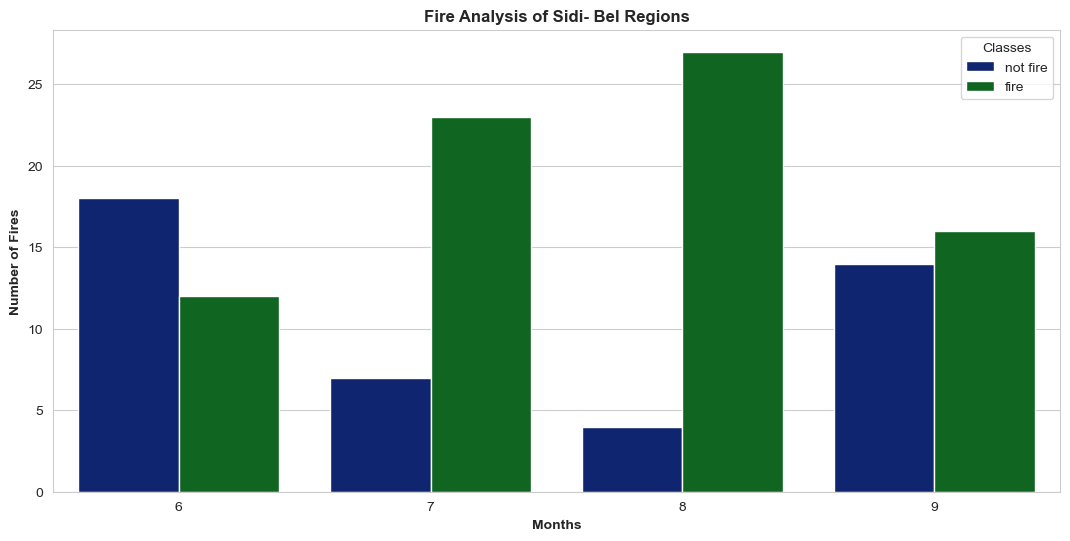

In [115]:
region1= df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.countplot(data=region1,x='month',hue='Classes')
sns.set_style('whitegrid')
plt.xlabel('Months',weight='bold')
plt.ylabel('Number of Fires',weight='bold')
plt.title('Fire Analysis of Sidi- Bel Regions',weight ='bold')
plt.show()

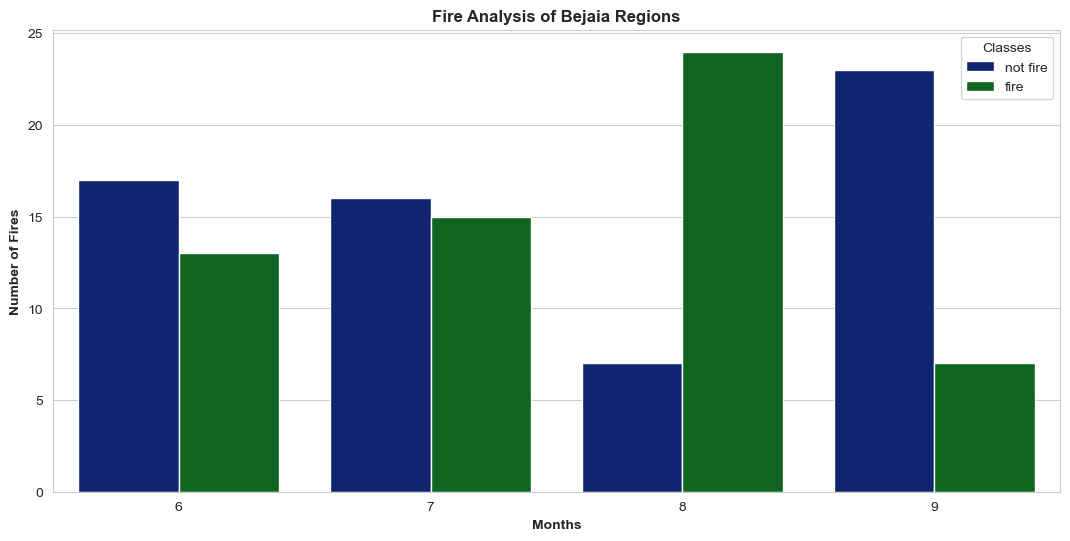

In [116]:
region0= df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.countplot(data=region0,x='month',hue='Classes')
sns.set_style('whitegrid')
plt.xlabel('Months',weight='bold')
plt.ylabel('Number of Fires',weight='bold')
plt.title('Fire Analysis of Bejaia Regions',weight ='bold')
plt.show()
